In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
df = pd.read_excel('videojuegos_limpio_gonza.xlsx')

In [6]:
df.shape
df.columns
df.info()
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2379 entries, 0 to 2378
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   game_name            2379 non-null   object        
 1   developer            2379 non-null   object        
 2   release_date_clean   2379 non-null   datetime64[ns]
 3   price                2379 non-null   object        
 4   rating               2379 non-null   float64       
 5   Single               2379 non-null   int64         
 6   Online_Coop          2379 non-null   int64         
 7   Online_PvP           2379 non-null   int64         
 8   MMO                  2379 non-null   int64         
 9   Cross_Platform       2379 non-null   int64         
 10  User_defined_tags    2379 non-null   object        
 11  difficulty           2379 non-null   int64         
 12  estimated_downloads  2379 non-null   int64         
dtypes: datetime64[ns](1), float64(1),

np.int64(0)

In [15]:
# Limpiar rating (coma → punto)
df['rating'] = df['rating'].astype(str).str.replace(',', '.')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Convert price to numeric
df['price'] = df['price'].astype(str).str.replace(',', '.')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Eliminar filas con NaN en columnas clave
df = df.dropna(subset=['price', 'estimated_downloads', 'rating'])

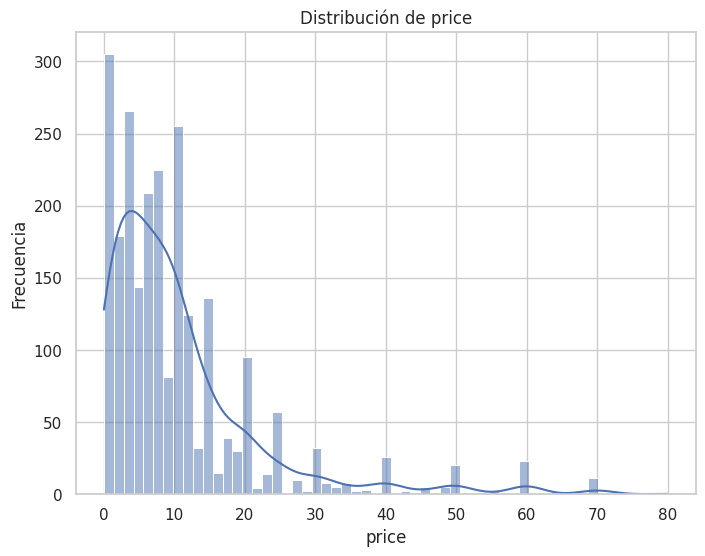

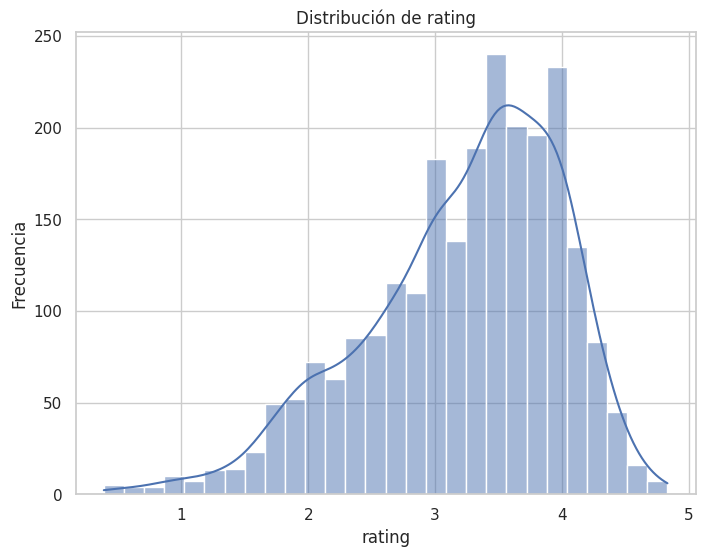

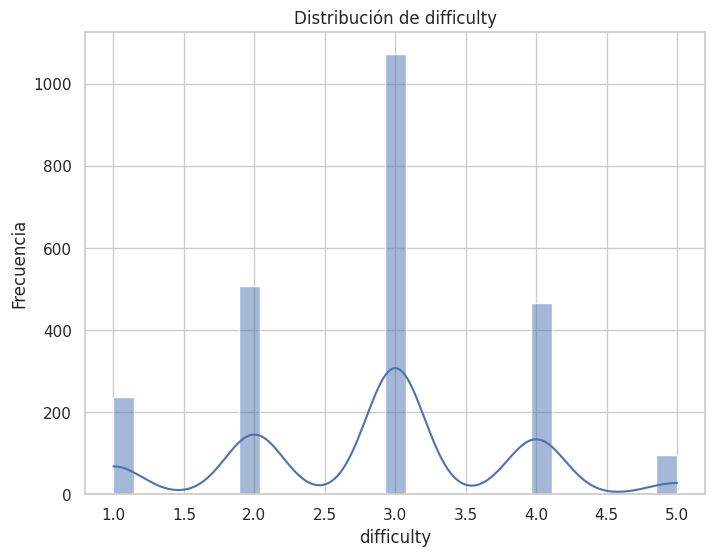

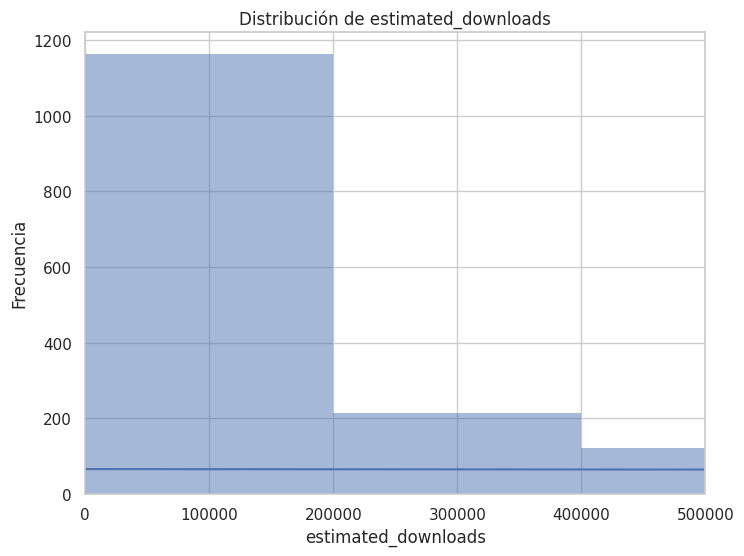

In [18]:
# Select numerical columns excluding the specified ones
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
exclude_cols = ['Single', 'Online_Coop', 'Online_PvP', 'MMO', 'Cross_Platform']
cols_to_plot = [col for col in numerical_cols if col not in exclude_cols]

# Create histograms for the selected columns with KDE
for col in cols_to_plot:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    if col == 'estimated_downloads':
        plt.xlim(0, 500000) # Setting x-axis limit to 500,000 (0.5 million)
    plt.show()

In [30]:
df['estimated_revenue'] = df['price'] * df['estimated_downloads']

top_10_revenue = df.nlargest(10, 'estimated_revenue')[['game_name', 'estimated_revenue']].copy()

# Format 'estimated_revenue' as currency
top_10_revenue['estimated_revenue'] = top_10_revenue['estimated_revenue'].apply(lambda x: f'${x:,.2f}')

print("Top 10 juegos por ingresos estimados:")
display(top_10_revenue)

Top 10 juegos por ingresos estimados:


,game_name,estimated_revenue
63,Call of Dutyï¿½ï¿½: Black O,"$4,930,795,500.00"
155,Call of Dutyï¿½ï¿½: Modern Warfareï¿,"$4,930,795,500.00"
61,Black Myth: Wukong,"$4,249,091,700.00"
16,HELLDIVERSï¿½ï¿,"$2,208,247,800.00"
37,ELDEN RING,"$1,709,972,400.00"
131,Palworld,"$1,481,611,600.00"
721,Sid Meierï¿½ï¿½ï¿½s Civilizatio,"$1,410,364,900.00"
4,Red Dead Redemption 2,"$1,296,383,900.00"
73,Baldur's Gate 3,"$1,190,709,700.00"
134,Red Dead Redemption,"$1,080,283,900.00"


In [24]:
# Split the 'User_defined_tags' string into a list of tags
df['genres'] = df['User_defined_tags'].str.split(',')

# Create a new DataFrame with one row per genre
genres_df = df.explode('genres')

# Clean up whitespace in the genre names
genres_df['genres'] = genres_df['genres'].str.strip()

display(genres_df.head())

,game_name,developer,release_date_clean,price,rating,Single,Online_Coop,Online_PvP,MMO,Cross_Platform,User_defined_tags,difficulty,estimated_downloads,estimated_revenue,genres
0,Counter-Strike 2,Valve,2012-08-21,0.00,3.20,0,0,1,0,1,FPS,4,306170000,0.000000e+00,FPS
1,PUBG: BATTLEGROUNDS,PUBG Corporation,2017-12-21,0.00,3.10,0,0,1,0,0,Survival,4,162350000,0.000000e+00,Survival
2,ELDEN RING NIGHTREIGN,"FromSoftware, Inc,",2025-05-30,25.99,3.96,1,1,0,0,0,Souls-like,4,840000,2.183160e+07,Souls-like
3,The Last of Usï¿½ï¿½ï¿½,Naughty Dog LLC,2023-03-28,59.99,4.10,1,0,0,0,0,Story Rich,3,2000000,1.199800e+08,Story Rich
4,Red Dead Redemption 2,Rockstar Games,2019-12-05,59.99,4.32,1,1,1,0,0,Open World,3,21610000,1.296384e+09,Open World


In [26]:
# Select the top 10 genres by estimated downloads
top_10_genres = genre_downloads.head(10)

print("Top 10 géneros por descargas estimadas:")
display(top_10_genres)

Top 10 géneros por descargas estimadas:


,genres,estimated_downloads
14,FPS,1470480230
21,Open World,748320540
36,Strategy,518174968
37,Survival,420392570
31,Simulation,303411522
25,RPG,269101100
3,Adventure,188994940
30,Shooter,179138400
13,Early Access,178922410
17,Horror,166756339


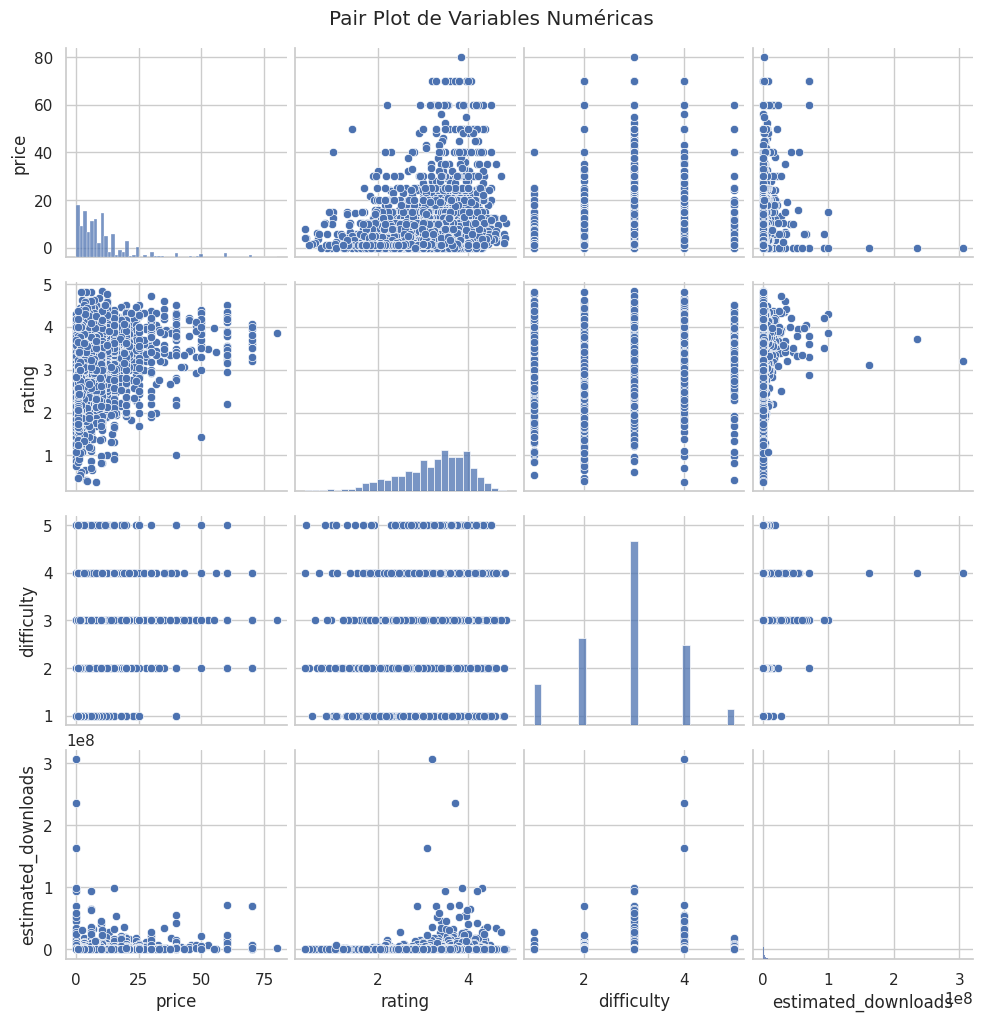

In [27]:
# Select numerical columns excluding the specified ones
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
exclude_cols = ['Single', 'Online_Coop', 'Online_PvP', 'MMO', 'Cross_Platform', 'estimated_revenue']
cols_for_pairplot = [col for col in numerical_cols if col not in exclude_cols]

# Create a pair plot
sns.pairplot(df[cols_for_pairplot])
plt.suptitle('Pair Plot de Variables Numéricas', y=1.02)
plt.show()

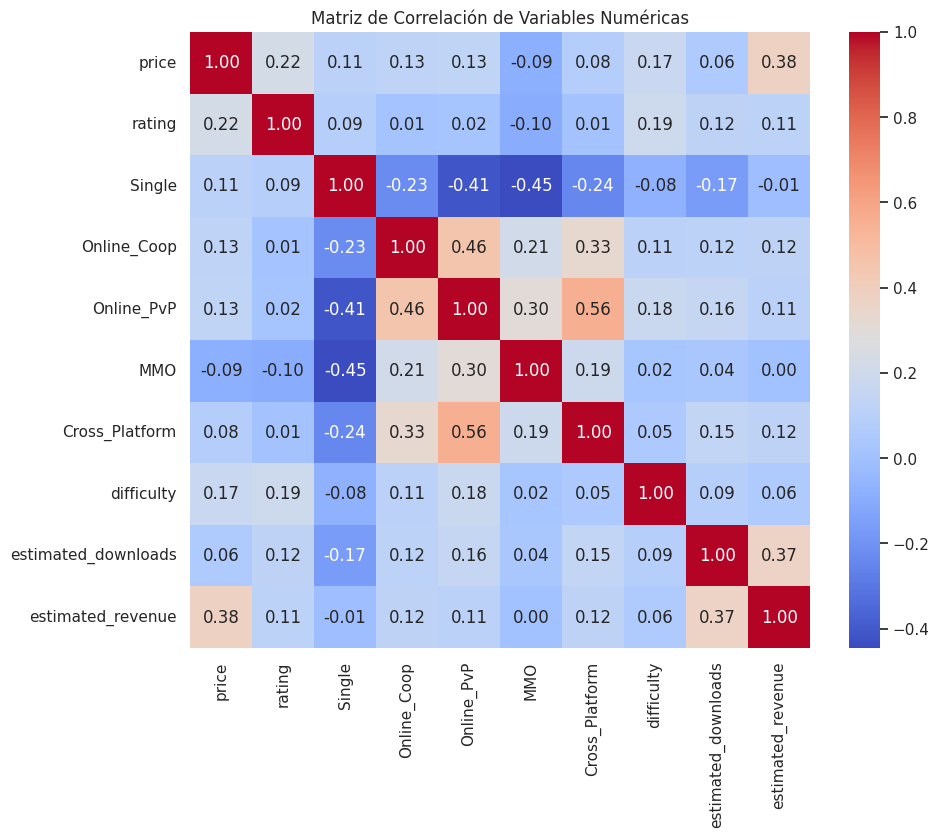

In [28]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

In [29]:
# Get the top 10 games by estimated downloads
top_10_downloaded_games = df.nlargest(10, 'estimated_downloads')

# Calculate the average rating of these games
average_rating_top_10_downloads = top_10_downloaded_games['rating'].mean()

print(f"El promedio de rating de los 10 juegos más descargados es: {average_rating_top_10_downloads:.2f}")

El promedio de rating de los 10 juegos más descargados es: 3.61
